In [21]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
airbnb = pd.read_csv(r"C:\Users\91800\Downloads\Airbnb Dataset 19.csv")

In [4]:
# examing the head of data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [10]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

In [6]:
#checking Duplicate and Droping these values 
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [7]:
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
#droping unnecessary cols
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [10]:
#Replacing review_per_month by zero
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [11]:
#Removing Nan values from  dataframe
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         249 non-null    int64  
 1   neighbourhood_group             249 non-null    object 
 2   neighbourhood                   249 non-null    object 
 3   latitude                        249 non-null    float64
 4   longitude                       249 non-null    float64
 5   room_type                       249 non-null    object 
 6   price                           249 non-null    int64  
 7   minimum_nights                  249 non-null    int64  
 8   number_of_reviews               249 non-null    int64  
 9   reviews_per_month               249 non-null    float64
 10  calculated_host_listings_count  249 non-null    int64  
 11  availability_365                249 non-null    int64  
dtypes: float64(3), int64(6), object(3)
m

In [12]:
# checking null value
airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
#checking the continuous values using the describe function
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.060964,1.738956,198.538153
std,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.002393,1.234635,126.048056
min,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.260000,1.000000,75.000000
50%,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.770000,1.000000,225.000000
75%,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

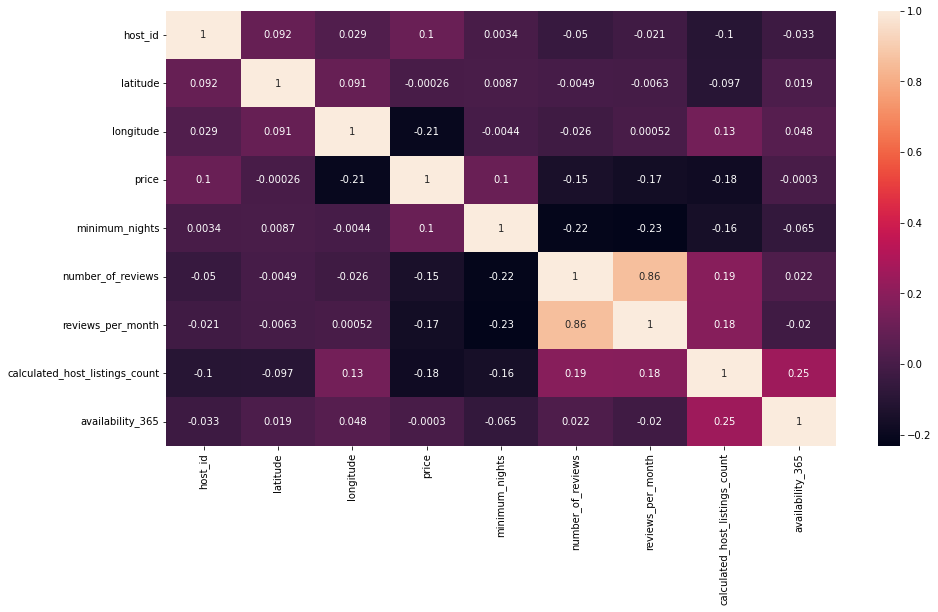

In [15]:
#checking the correlation between cols of dataframe
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

#### Ploting the neighbourhood_group's and cheking the count of neighbourhood_group

C:\Users\91800\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

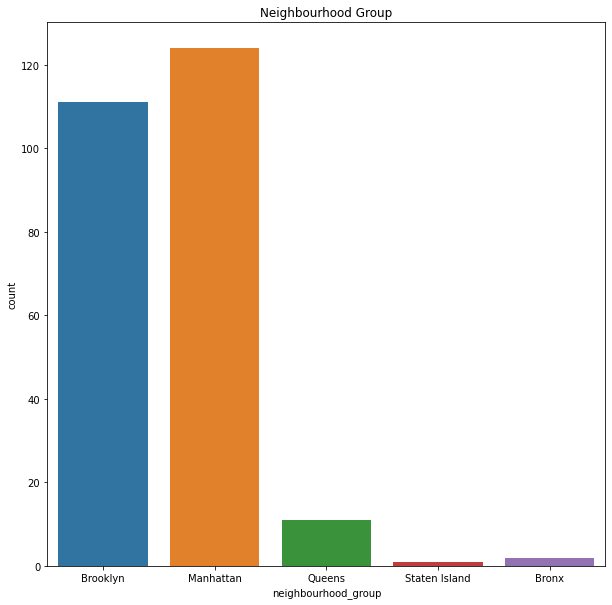

In [18]:
sns.countplot(airbnb['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

### checking the neighbourhood

C:\Users\91800\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood')

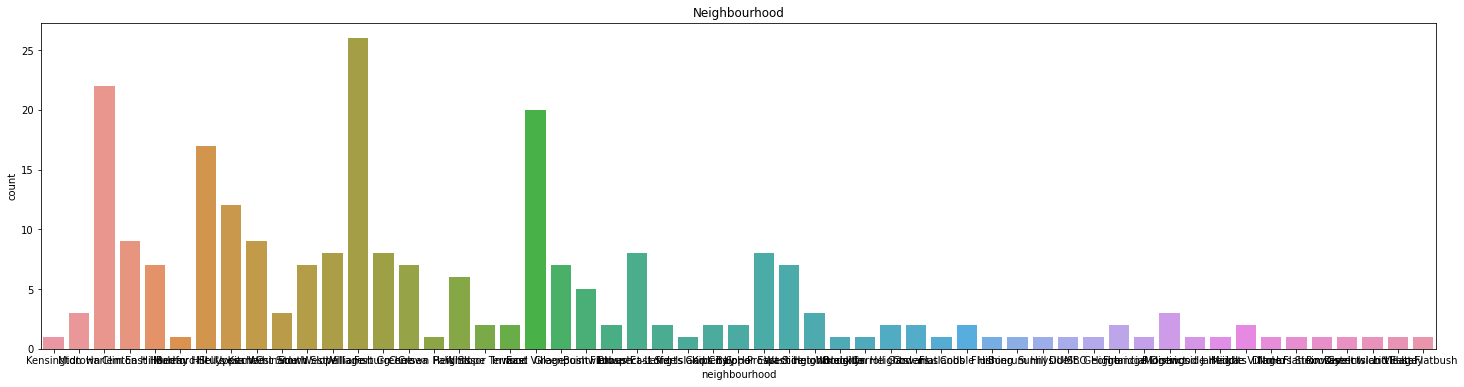

In [25]:
sns.countplot(airbnb['neighbourhood'])
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

In [24]:
#checking the type of room's

C:\Users\91800\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Room type')

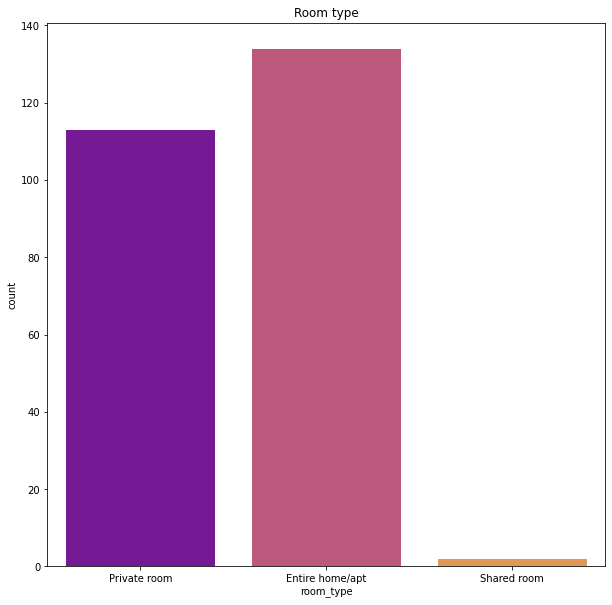

In [38]:

sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room type')

In [27]:
# checking  relation between Neighbouring groups and Availability of room's 

### Brookiyn has the more number  of availability as compaired to others groups 

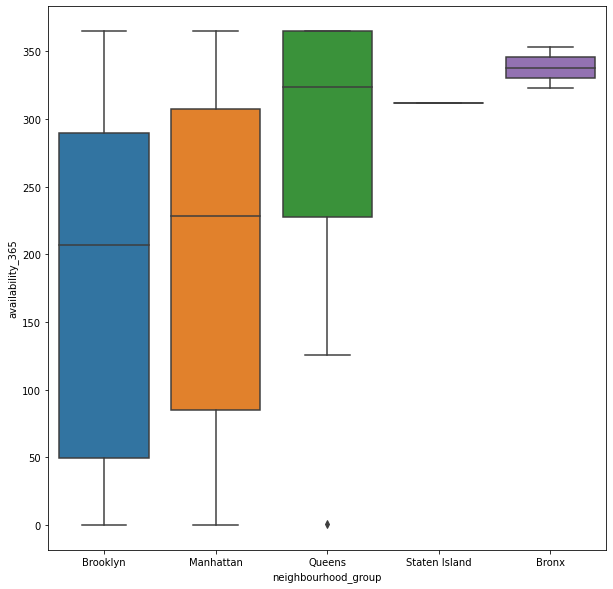

In [28]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365')

### ploting scatter plot to checking the distribution of Neighbourhood group

C:\Users\91800\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


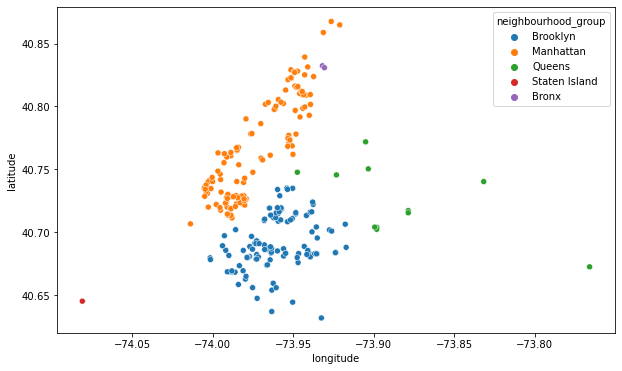

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

In [40]:
# Neighbourhood

C:\Users\91800\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


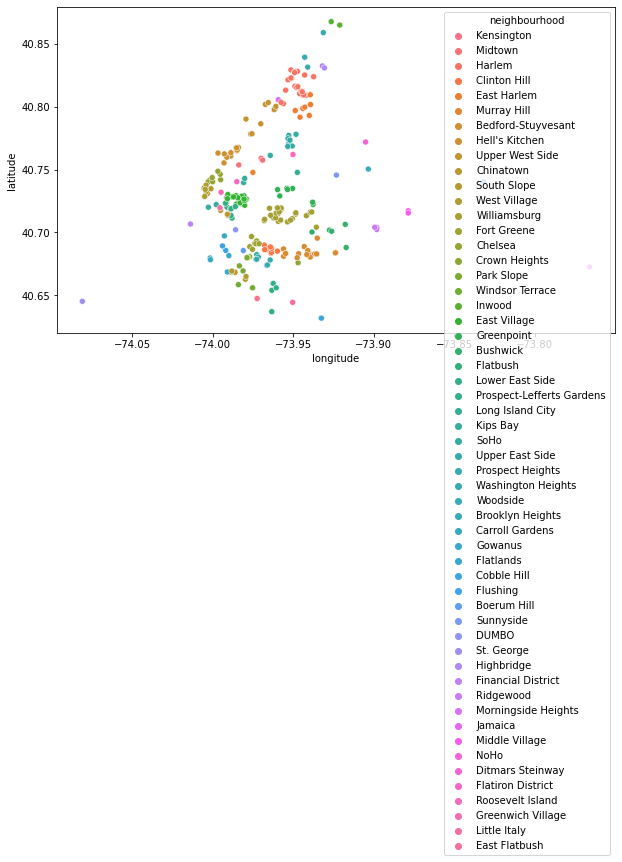

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood)
plt.ioff()

C:\Users\91800\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


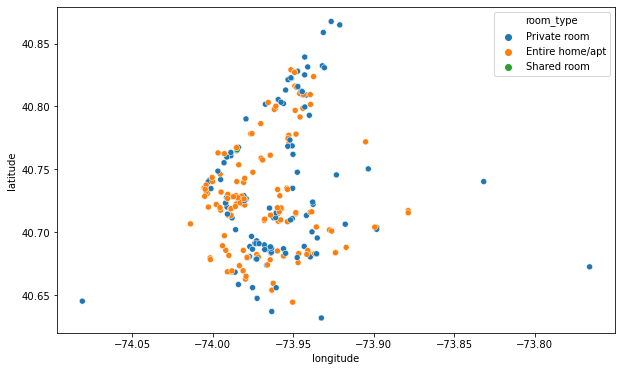

In [34]:
#checking the Room type  wrt latitude and longitude 
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

In [41]:
#Availability of Room 365 days  or across the whole year

C:\Users\91800\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


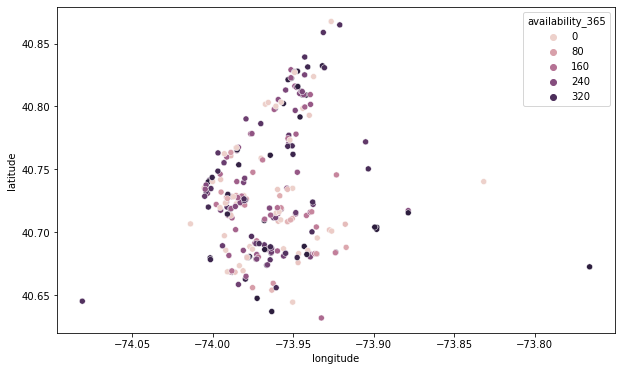

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()